# Week 3 Challenge

### Import necessary packages

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Read the dataset, store in a DataFrame

In [8]:
file = pd.read_csv('week3_challenge.csv')
file.head()
#file.dtypes

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,Product,Income,ID,ApplicationID,__v,CompletedAt,score,demofeatures_debt_to_income_ratio,demofeatures_net_income_band,demofeatures_appweek,demofeatures_payweek,demofeatures_time_at_employer_mths,demofeatures_age_at_application_yrs,demofeatures_device,demofeatures_loan_purpose,demofeatures_time_curr_address,demofeatures_residence_state,demofeatures_bank_name,demofeatures_level_of_education,demofeatures_marital_status,demofeatures_residential_status,demofeatures_employment_status_clients,demofeatures_gender,demofeatures_num_children,demofeatures_num_employers,demofeatures_next_of_kin_relationship,demofeatures_avg_household_exp_pm,demofeatures_num_in_household,demofeatures_facebookid,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,jazzScore,clientKey,loanKey,loanId,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,utcOffset,clientId,createdAt,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_

### Cleanup wrongly read filetypes

In [4]:
file.SystemCustomerID = file.SystemCustomerID.astype(str)
file.SystemLoanID = file.SystemLoanID.astype(str)
file.createdAt_Month = pd.to_datetime(file.createdAt_Month, format = '%Y%m')
file.CompletedAt = pd.to_datetime(file.CompletedAt)
file.clientId = file.clientId.astype(str)
file.createdAt = pd.to_datetime(file.createdAt)

In [7]:
file.dtypes

Unnamed: 0                                           int64
createdAt_Month                                      int64
Reason                                              object
application_id                                      object
SystemCustomerID                                     int64
SystemLoanID                                         int64
income_source                                       object
income_verified                                       bool
next_loan_number                                     int64
country                                             object
DecisionFlag                                        object
Product                                             object
Income                                             float64
ID                                                  object
ApplicationID                                       object
__v                                                float64
CompletedAt                                         obje

### Remove columns from the dataframe that have more than 30% of their values missing

In [4]:
missing = file.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(missing, columns = ['Missing'])
columns_to_drop = missing_df[missing_df.Missing > file.shape[0]*0.3]
columns_to_drop.count()

Missing    18
dtype: int64

In [5]:
cols = columns_to_drop.index[0:18]
dropped_file = file.drop(cols,axis=1)
dropped_file.shape    # Shape of DataFrame after dropping columns with more than 30% of Nulls

(11993, 272)

In [6]:
dropped_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993 entries, 0 to 11992
Columns: 272 entries, Unnamed: 0 to installationId
dtypes: bool(1), datetime64[ns](2), float64(243), int64(2), object(24)
memory usage: 24.8+ MB


### Create a new dataframe containing only the numeric columns (integers and floats) in the dataset 

In [7]:
numeric_cols = dropped_file.select_dtypes(include=['Int64','float64'])
numeric_cols.head()

,Unnamed: 0,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_08_out,callFeatures_09_out,callFeatures_10_out,callFeatures_11_out,callFeatures_12_out,callFeatures_13_out,callFeatures_14_out,callFeatures_15_out,callFeatures_16_out,callFeatures_17_out,callFeatures_18_out,callFeatures_19_out,callFeatures_20_out,callFeatures_21_out,callFeatures_22_out,callFeatures_23_out,callFeatures_dur_01_in,callFeatures_dur_02_in,callFeatures_dur_03_in,callFeatures_dur_04_in,callFeatures_dur_05_in,callFeatures_dur_06_in,callFeatures_dur_07_in,callFeatures_dur_08_in,callFeatures_dur_09_in,callFeatures_dur_10_in,callFeatures_dur_11_in,callFeatures_dur_12_in,callFeatures_dur_13_in,callFeatures_dur_14_in,callFeatures_dur_15_in,callFeatures_dur_16_in,callFeatures_dur_17_in,callFeatures_dur_18_in,callFeatures_dur_19_in,callF

In [8]:
numeric_cols.shape

(11993, 245)

### Drop unnecessary columns
* **Unnamed: 0**: It's an index and not a feature
* **__v**: It contains only zeros and doesnt add to variablilty of the dataset

In [9]:
numeric_cols = numeric_cols.drop(['Unnamed: 0','__v'], axis= 1)
numeric_cols.shape

(11993, 243)

### Replace null values in the numeric dataframe with 0

In [10]:
non_null_df = numeric_cols.fillna(0)
non_null_df.describe()

,next_loan_number,Income,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_08_out,callFeatures_09_out,callFeatures_10_out,callFeatures_11_out,callFeatures_12_out,callFeatures_13_out,callFeatures_14_out,callFeatures_15_out,callFeatures_16_out,callFeatures_17_out,callFeatures_18_out,callFeatures_19_out,callFeatures_20_out,callFeatures_21_out,callFeatures_22_out,callFeatures_23_out,callFeatures_dur_01_in,callFeatures_dur_02_in,callFeatures_dur_03_in,callFeatures_dur_04_in,callFeatures_dur_05_in,callFeatures_dur_06_in,callFeatures_dur_07_in,callFeatures_dur_08_in,callFeatures_dur_09_in,callFeatures_dur_10_in,callFeatures_dur_11_in,callFeatures_dur_12_in,callFeatures_dur_13_in,callFeatures_dur_14_in,callFeatures_dur_15_in,callFeatures_dur_16_in,callFeatures_dur_17_in,callFeatures_dur_18_in,callFeatures_dur_19_in,callFeatures_dur_20_

### Check Correlation of Features

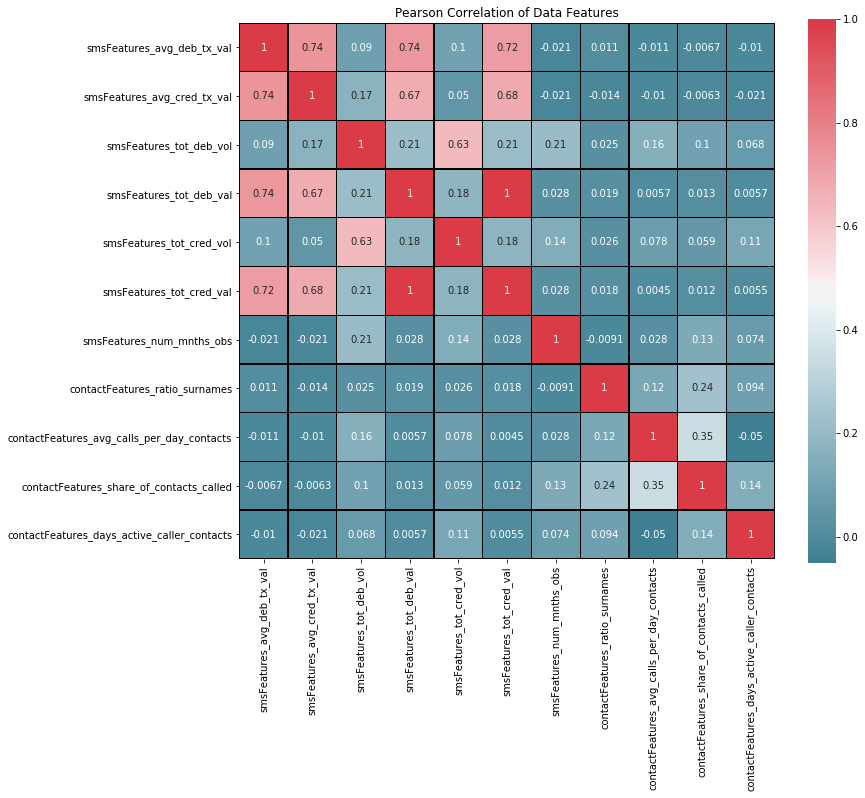

In [11]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Data Features')
sns.heatmap(non_null_df.iloc[:,33:44].astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax, linecolor='black', annot=True);

### Scale the numeric dataframe: StandardScaler()

In [12]:
x = non_null_df.values
x_standard = StandardScaler().fit_transform(x)
x_standard.mean(axis=0).round(2)    # Check that Means are all 0

array([-0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0

In [13]:
# Check that Standard Deviations are 1
x_standard.std(axis=0).round(2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
# Store Scaled values in a DataFrame 
standard_df = pd.DataFrame(x_standard, columns = non_null_df.columns)
standard_df.describe().round(2)

,next_loan_number,Income,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_08_out,callFeatures_09_out,callFeatures_10_out,callFeatures_11_out,callFeatures_12_out,callFeatures_13_out,callFeatures_14_out,callFeatures_15_out,callFeatures_16_out,callFeatures_17_out,callFeatures_18_out,callFeatures_19_out,callFeatures_20_out,callFeatures_21_out,callFeatures_22_out,callFeatures_23_out,callFeatures_dur_01_in,callFeatures_dur_02_in,callFeatures_dur_03_in,callFeatures_dur_04_in,callFeatures_dur_05_in,callFeatures_dur_06_in,callFeatures_dur_07_in,callFeatures_dur_08_in,callFeatures_dur_09_in,callFeatures_dur_10_in,callFeatures_dur_11_in,callFeatures_dur_12_in,callFeatures_dur_13_in,callFeatures_dur_14_in,callFeatures_dur_15_in,callFeatures_dur_16_in,callFeatures_dur_17_in,callFeatures_dur_18_in,callFeatures_dur_19_in,callFeatures_dur_20_

### Perform a PCA reduction on the numeric dataframe (Only include the first 5 principal components)
- Store the results in a pandas dataframe. 
- Print the total variance explained by the first 5 principal components.

In [15]:
# Create PCA
pca = PCA(n_components=5, random_state=42)

# fit the data to the model
principalComponents = pca.fit_transform(x_standard)

principalComponents.shape

(11993, 5)

In [16]:
# create dataframe containing principal components
principal_cols = ['principal component 1', 'principal component 2','principal component 3',
                  'principal component 4', 'principal component 5']
principalDf = pd.DataFrame(data = principalComponents, columns = principal_cols)

# display top 5 principal components
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.221739,-2.270727,0.763760,-1.596420,4.226660
1,13.461897,-3.655707,-2.136469,-0.890085,-0.204241
2,5.898803,-2.348850,0.101387,0.483909,0.256908
3,-1.883685,1.377414,-0.203857,3.302768,0.286826
4,2.635386,1.728562,0.545234,-2.890742,-0.892726


In [17]:
# Print the total variance explained by the first 5 principal components 
pca.explained_variance_ratio_

array([0.35686695, 0.09457432, 0.03848199, 0.03396483, 0.027783  ])

In [18]:
# Print the sum of the explained variance ratio
pca.explained_variance_ratio_.sum()

0.5516710916363528

### Use sklearn’s KMeans function to cluster the numeric PCA dataframe into 3 clusters and plot the clusters.

In [19]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
# fit data 
clusters = model.fit_predict(principalComponents)
clusters

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

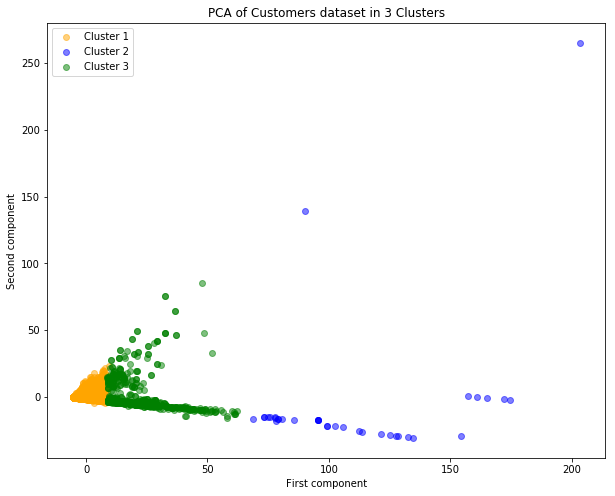

In [20]:
plt.figure(figsize = (10,8))

plt.scatter(principalComponents[clusters == 0, 0], principalComponents[clusters == 0, 1], alpha=.5, 
            color = 'orange', label='Cluster 1')

plt.scatter(principalComponents[clusters == 1, 0], principalComponents[clusters == 1, 1], alpha=.5, 
            color = 'blue', label='Cluster 2')

plt.scatter(principalComponents[clusters == 2, 0], principalComponents[clusters == 2, 1], alpha=.5, 
            color = 'green', label='Cluster 3')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA of Customers dataset in 3 Clusters');

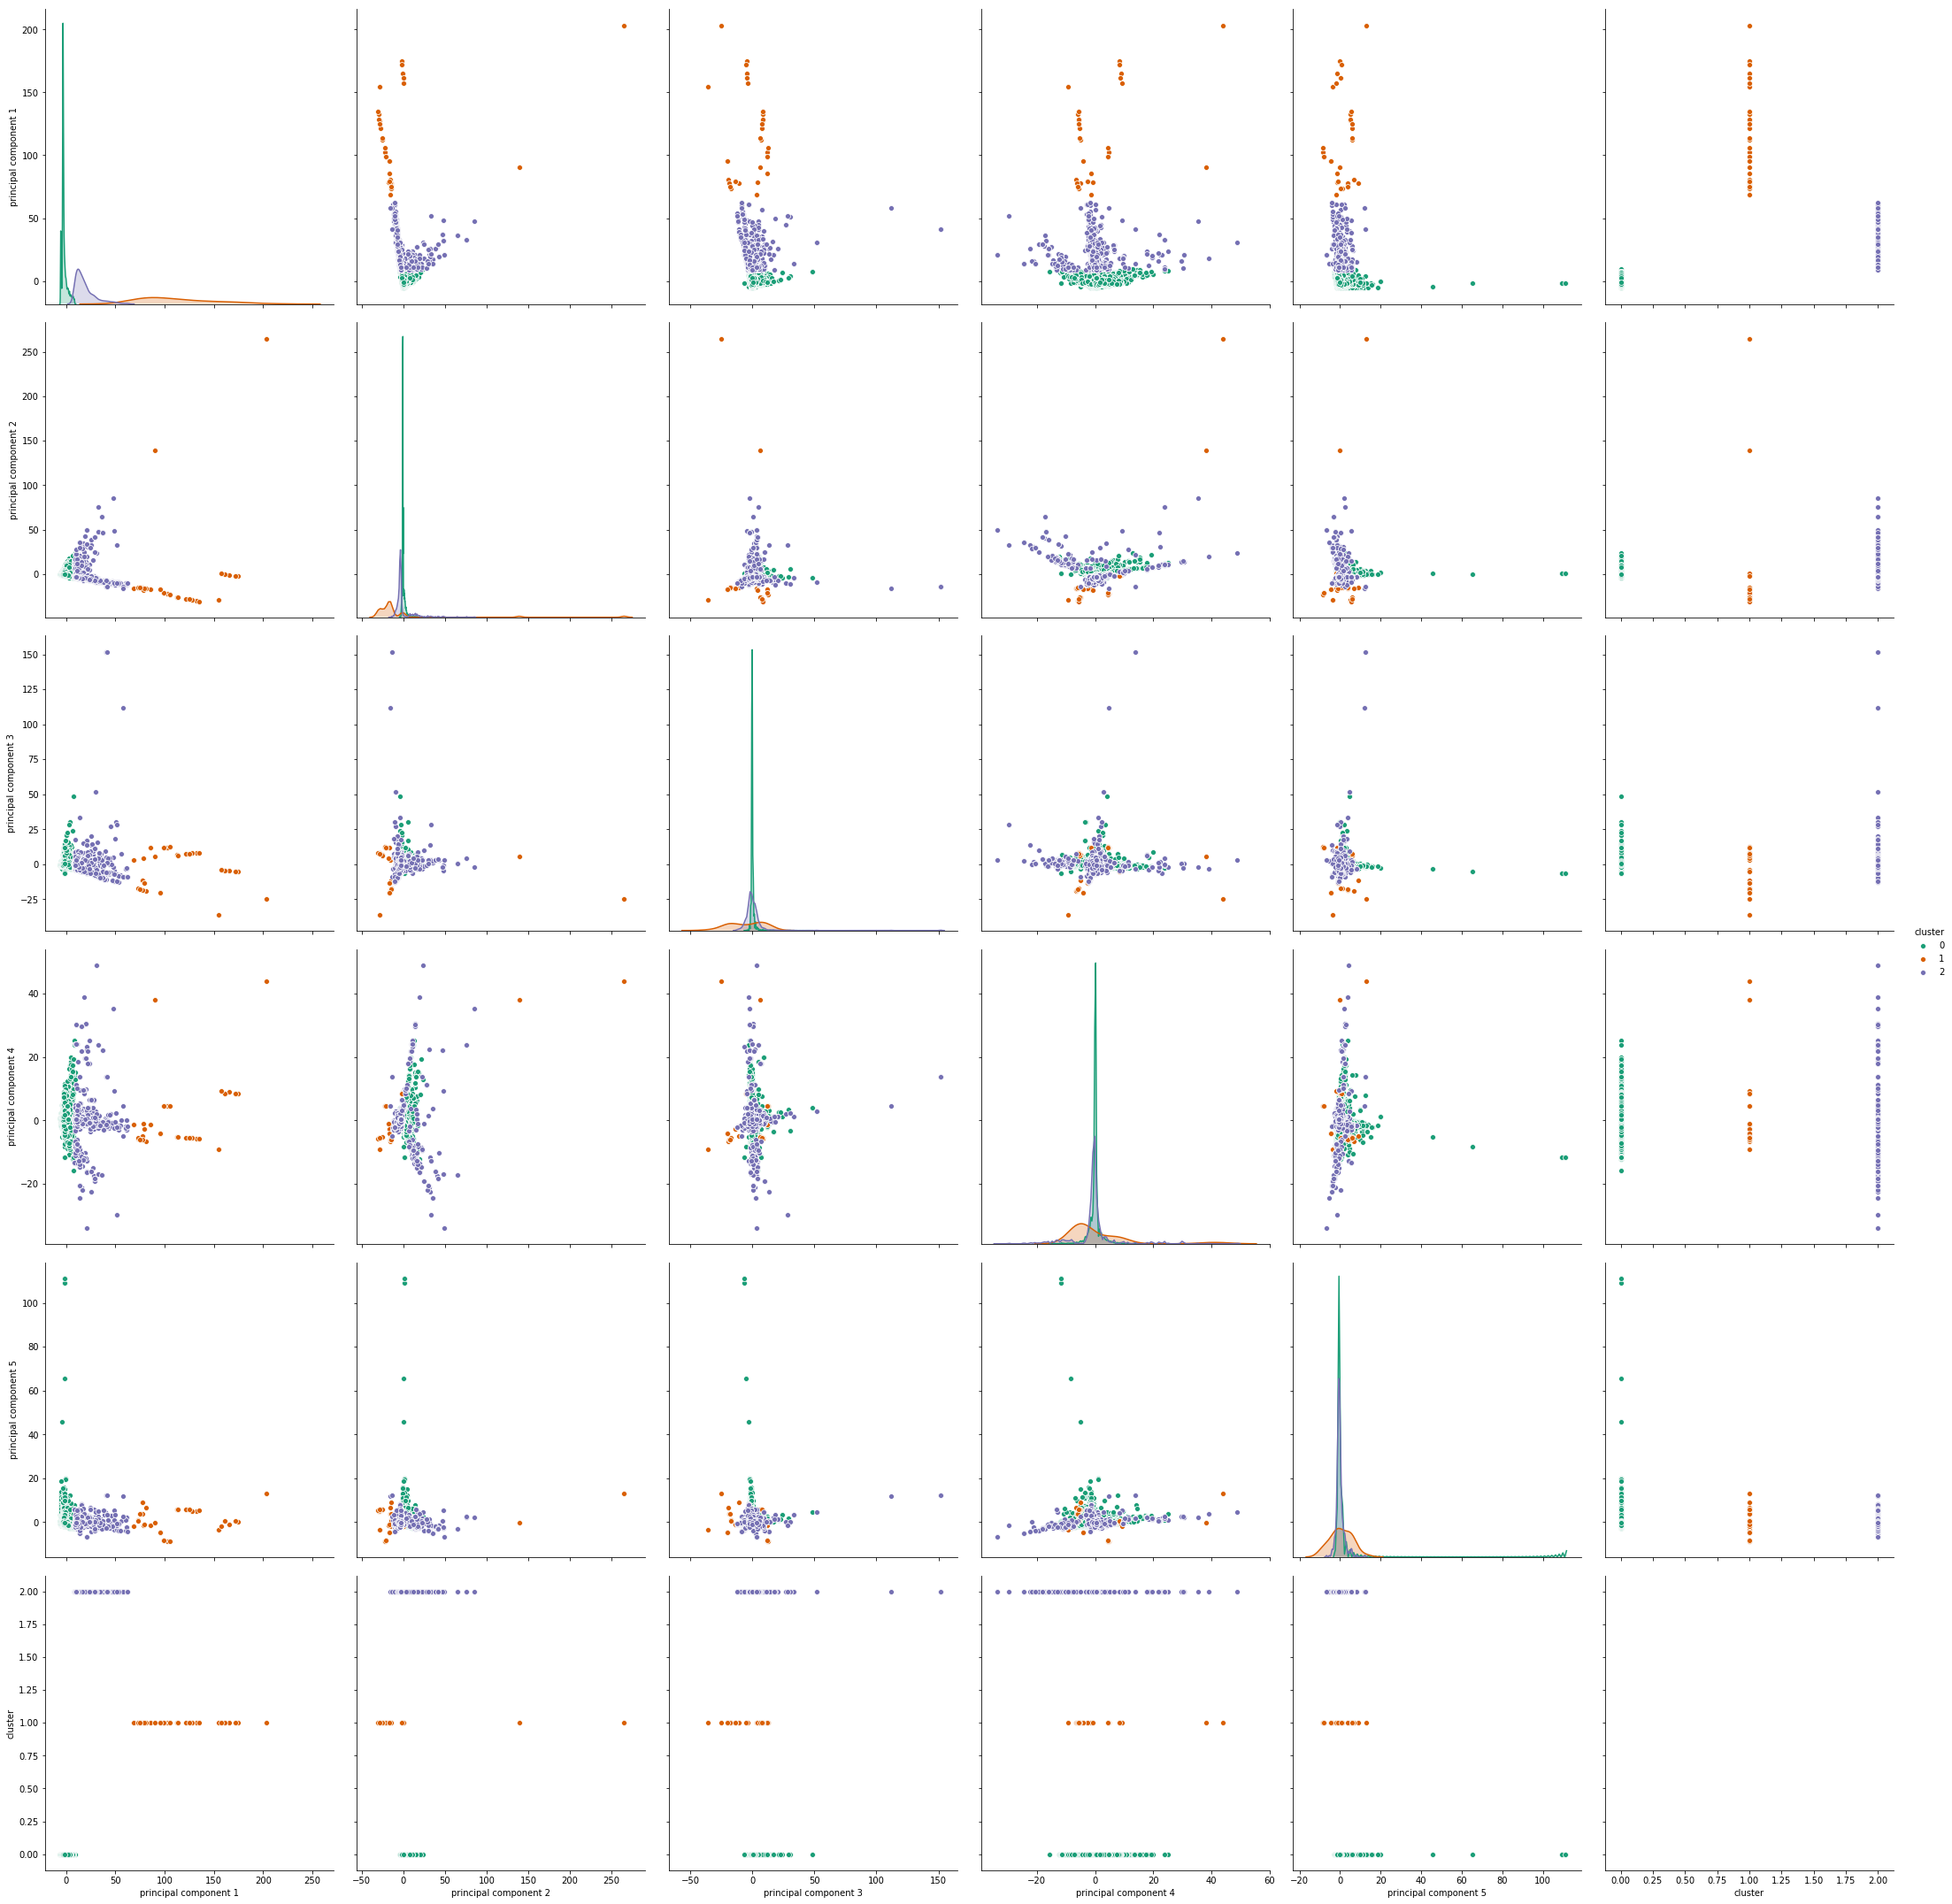

In [21]:
# Assign clusters to a new column 'cluster'
principalDf['cluster'] = clusters

# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(principalDf, hue='cluster', palette= 'Dark2', diag_kind='kde',size=5);

## Use the Elbow Method to check if n_clusters = 3 is optimal

In [22]:
sse = {}
# Fit KMeans and calculate SSE for each k
for c in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=c, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(principalComponents)
    
    # Assign sum of squared distances to k element of dictionary
    sse[c] = kmeans.inertia_

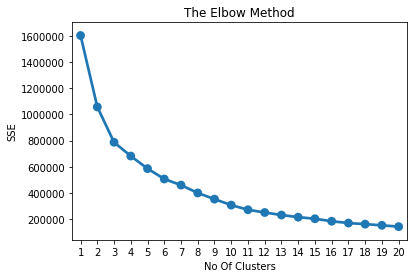

In [42]:
# Plot SSE for each *c*
plt.title('The Elbow Method')
plt.xlabel('No Of Clusters'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Reconnect final clusters of each observation to the original dataframe

In [24]:
# Drop Unnamed: 0: It's an index and not a feature
file_to_reconnect = file.drop('Unnamed: 0', axis = 1)
pca_clusters_df = pd.concat([file_to_reconnect, principalDf.cluster], axis = 1)

### GroupBy Clusters

In [25]:
grouping = pca_clusters_df.groupby('cluster')

## Exploratory Analysis

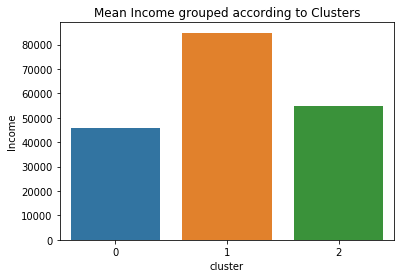

In [26]:
data_mean = grouping['Income'].mean().reset_index()
sns.barplot(x='cluster', y='Income', data=data_mean)
plt.title('Mean Income grouped according to Clusters');

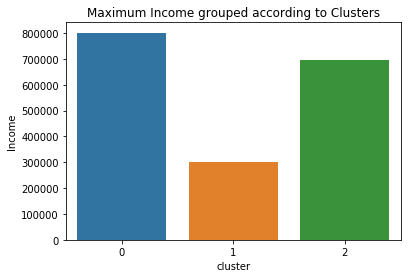

In [27]:
data_max = grouping['Income'].max().reset_index()
sns.barplot(x='cluster', y='Income', data=data_max)
plt.title('Maximum Income grouped according to Clusters');

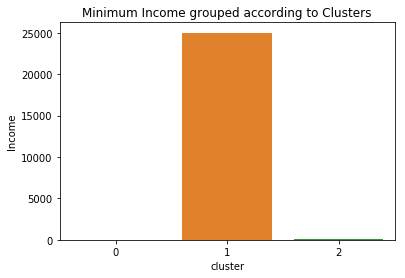

In [28]:
data_min = grouping['Income'].min().reset_index()
sns.barplot(x='cluster', y='Income', data=data_min)
plt.title('Minimum Income grouped according to Clusters');

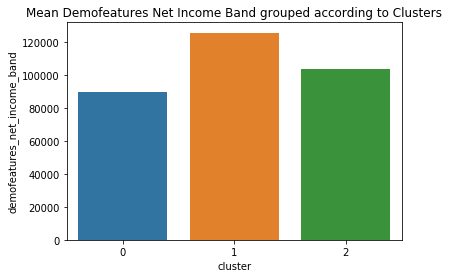

In [29]:
demo_income_mean = grouping['demofeatures_net_income_band'].mean().reset_index()
sns.barplot(x='cluster', y='demofeatures_net_income_band', data=demo_income_mean)
plt.title('Mean Demofeatures Net Income Band grouped according to Clusters');

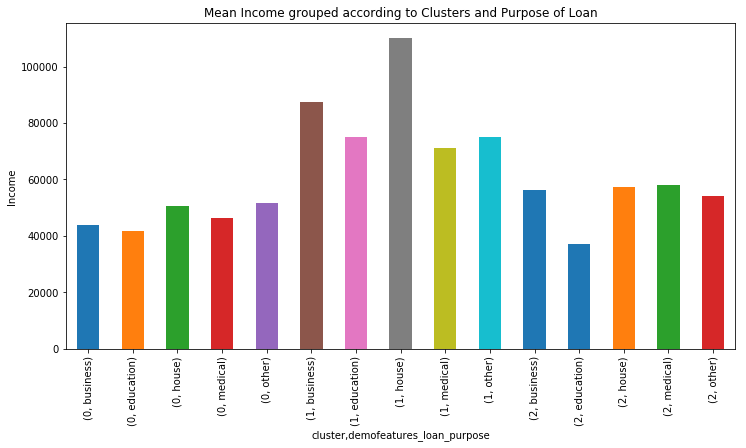

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_loan_purpose']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Purpose of Loan');

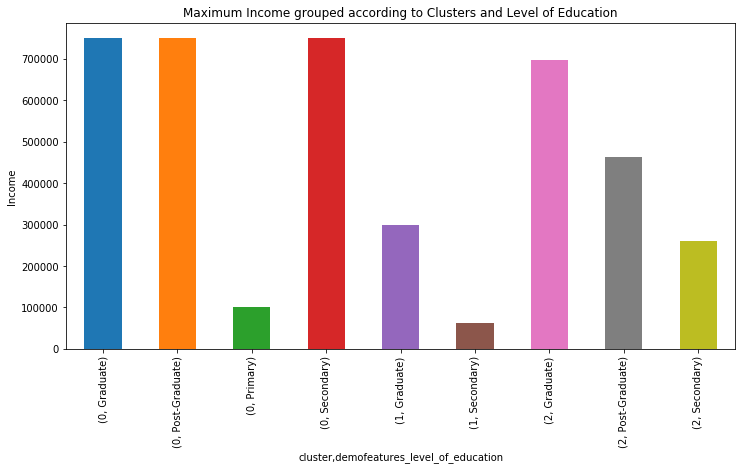

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_level_of_education']).max()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Maximum Income grouped according to Clusters and Level of Education');

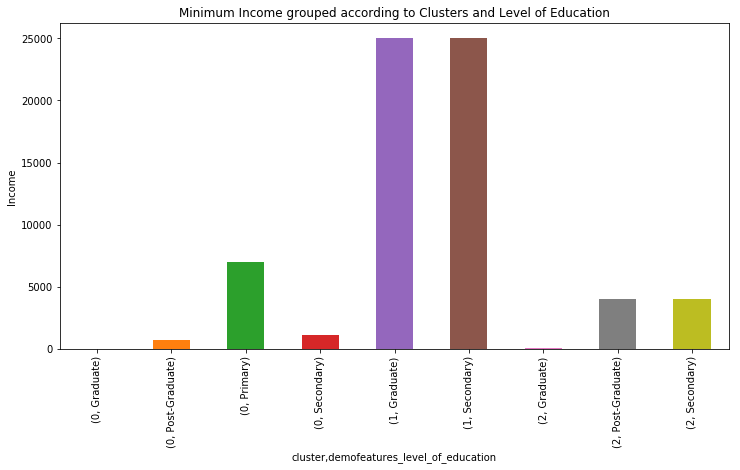

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_level_of_education']).min()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Minimum Income grouped according to Clusters and Level of Education');

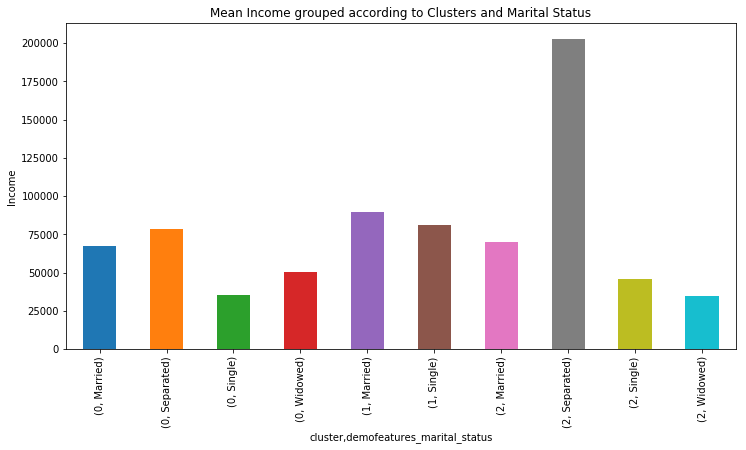

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_marital_status']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Marital Status');

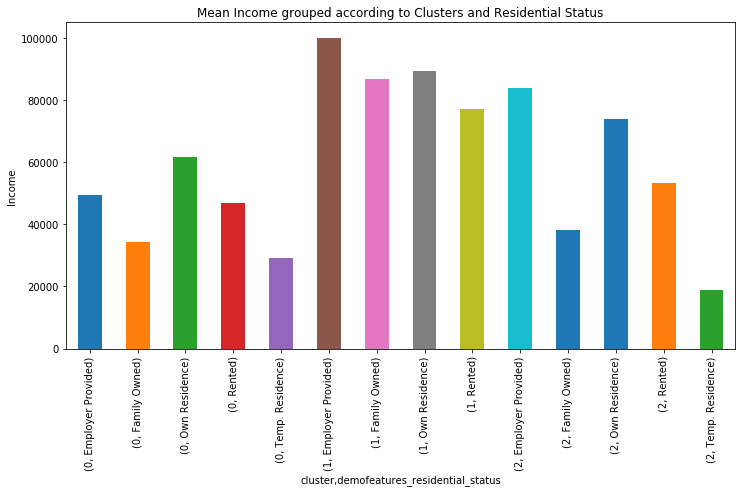

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_residential_status']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Residential Status');

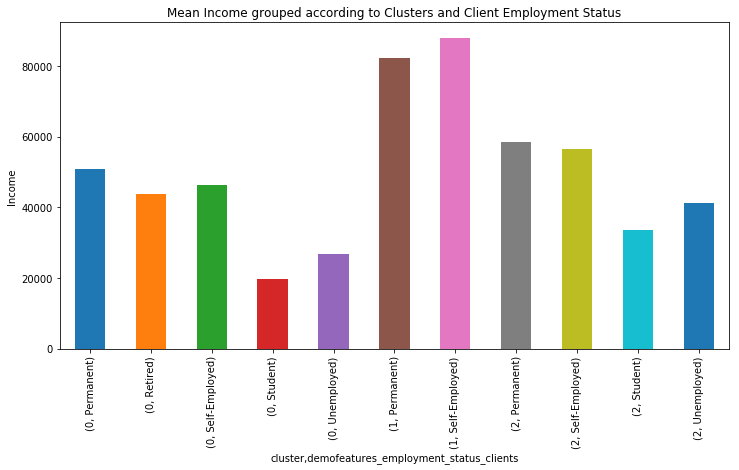

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_employment_status_clients']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Client Employment Status');

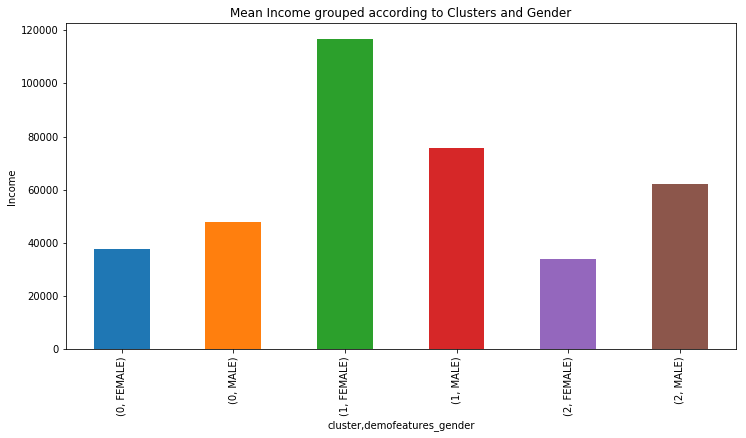

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_gender']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Gender');

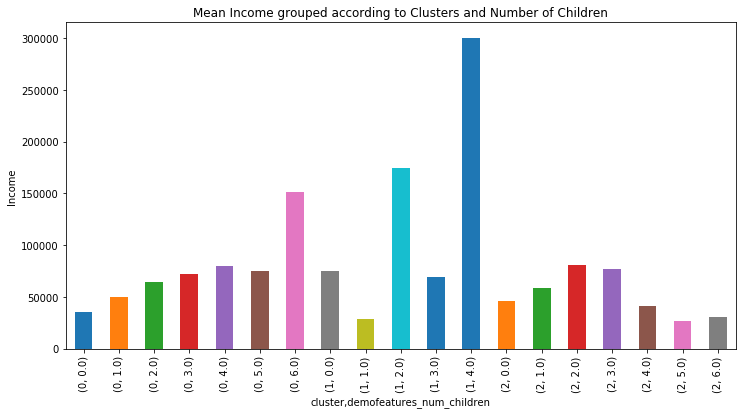

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
pca_clusters_df.groupby(['cluster','demofeatures_num_children']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and Number of Children');

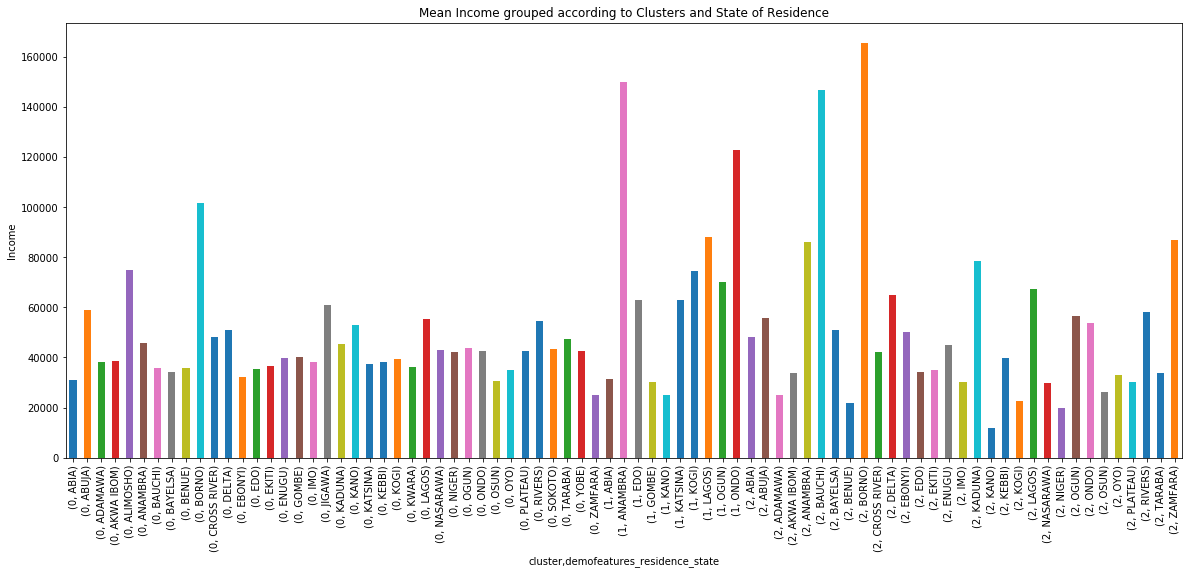

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
pca_clusters_df.groupby(['cluster','demofeatures_residence_state']).mean()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Clusters and State of Residence');

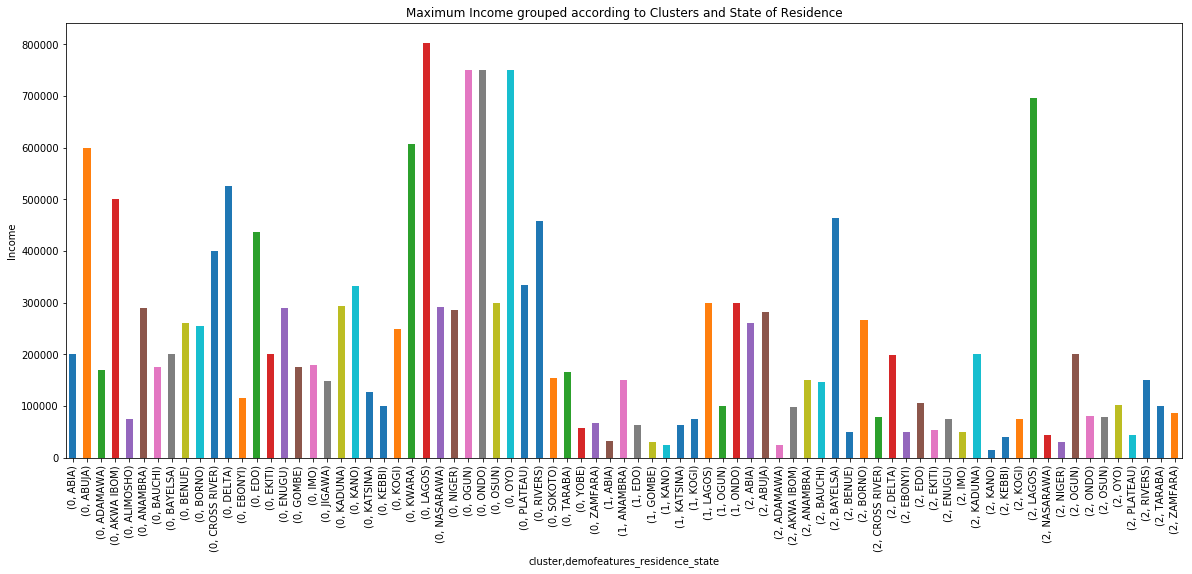

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
pca_clusters_df.groupby(['cluster','demofeatures_residence_state']).max()['Income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Maximum Income grouped according to Clusters and State of Residence');

## More EDA

In [40]:
# Clusters Grouped by Genders
unique_customers = grouping['demofeatures_gender'].apply(pd.Series.value_counts).reset_index()
unique_customers

,cluster,level_1,demofeatures_gender
0,0,MALE,9009
1,0,FEMALE,2081
2,1,MALE,28
3,1,FEMALE,8
4,2,MALE,641
5,2,FEMALE,224


In [41]:
# Mean, Minimum and Maximum of features that might be important, aswell as their count
grouping.agg({
    'Income': ['mean','min','max'],
    'demofeatures_net_income_band': ['mean','min','max'],
    'demofeatures_num_children': ['mean','min','max'],
    'demofeatures_net_income_band': ['mean','min','max'],
    'predictedIncome': ['mean','min','max'],
    'demofeatures_age_at_application_yrs': ['mean','min','max', 'count']
  }).round(1)

Income                    demofeatures_net_income_band                    demofeatures_num_children           predictedIncome                demofeatures_age_at_application_yrs                    
            mean      min       max                         mean      min       max                      mean  min  max            mean  min       max                                mean   min    max  count
cluster                                                                                                                                                                                                       
0        45874.0     18.5  801776.7                      89461.2      0.0  750000.0                       0.8  0.0  6.0         37594.7 -1.0  277381.2                                29.5  17.0  147.0  11090
1        84844.6  25000.0  300000.0                     125694.4  25000.0  500000.0                       1.2  0.0  4.0         57441.2 -1.0  181413.6                                31.5  21.0   45.0     36
2        54904.4     74.2  696986.0                     103959.5  25000.0  750000.0                       0.9  0.0  6.0         43168.3 -1.0  219053.9                                31.9  19.0   57.0    865